# Data Improvement

In [ ]:
import sys
sys.path.append('../src')

import pandas as pd

from preprocessing import load_and_preprocess_data
from glrt import evaluate_glrt
from data_improvement import compute_removal_ratio, remove_misclassified_data, save_improved_dataset, plot_confusion_matrix

## Load Data

In [2]:
X_train, X_test, y_train, y_test, signal2_start_times = load_and_preprocess_data(
    filepath='../data/original/processed_signals.mat'
)

In [3]:
glrt_preds_df = pd.read_csv("../results/noattack/glrt_test_predictions.csv")
glrt_preds = glrt_preds_df["y_pred"].values

threshold_df = pd.read_csv("../results/noattack/glrt_accuracy.csv")
threshold = float(threshold_df["glrt_threshold"].values[0])
glrt_acc = float(threshold_df["test_accuracy"].values[0])

print(f"Loaded GLRT threshold: {threshold:.4f}")
print(f"Original GLRT Accuracy: {glrt_acc:.4f}")

Loaded GLRT threshold: 13.2939
Original GLRT Accuracy: 0.9190


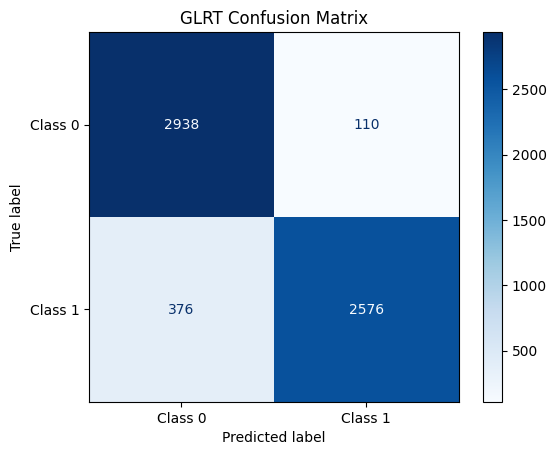

In [4]:
plot_confusion_matrix(
    y_true=y_test,
    y_pred=glrt_preds,
    title="GLRT Confusion Matrix",
)

## Update Data

In [5]:
removal_ratio = compute_removal_ratio(y_test, glrt_preds, target_accuracy=0.98)
print(f"Calculated removal ratio to reach 98%: {removal_ratio:.4f}")

Calculated removal ratio to reach 98%: 0.7685


In [6]:
X_test_filtered, y_test_filtered, removed_indices = remove_misclassified_data(
    X_test, y_test, glrt_preds, removal_ratio=0.7685
)

### Check Upated Results

In [7]:
glrt_acc_filtered, glrt_preds_filtered = evaluate_glrt(X_test_filtered, y_test_filtered, threshold)

In [8]:
print(f"Filtered GLRT Accuracy: {glrt_acc_filtered:.4f}")

Filtered GLRT Accuracy: 0.9797


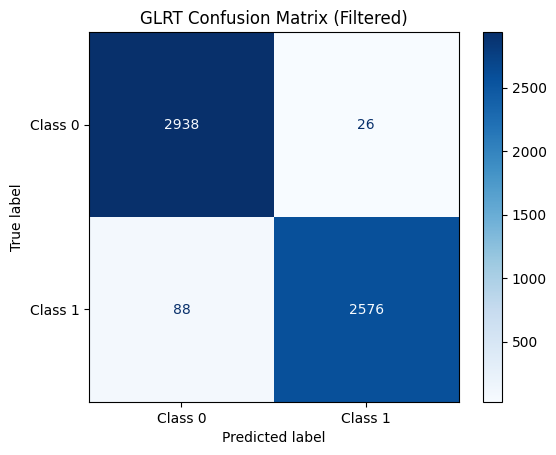

In [9]:
plot_confusion_matrix(
    y_true=y_test_filtered,
    y_pred=glrt_preds_filtered,
    title="GLRT Confusion Matrix (Filtered)",
)

## Save and Export Filtered Data

In [10]:
save_improved_dataset(
    X_train, X_test_filtered, y_train, y_test_filtered,
    signal2_start_times, removed_indices,
    filename='../data/processed/improved_signals.mat'
)

Improved dataset saved to ../data/processed/improved_signals.mat
